## Final Project Submission

Please fill out: 
* Student name: Mercy Chebet Tegekson
* Student pace: full time
* Scheduled project review date/time: 9/15/2023
* Instructor name: Lucille Kaleha
* Blog post URL:


In [72]:
# Your code here - remember to use markdown cells for comments as well!

# MOVIE RECOMMENDATION

![image](PROJECT1/Front image.jpg)

## Table of contents

*[Introduction](#introduction)

*[Problem statement](#Problem-statement)

*[Main objectives](#main-objectives)

*[Specific Objectives](#specific-objectives)

*[Notebookstructure](#notebook-structure)

*[Importing relevant libraries](#importing-relevant-libraries)

*[Data cleaning](#data-cleaning)

*[Exploratory data analysis](#exploratory-data-analysis)

*[Data analysis](#data-analysis)

*[Conclusions](#conclusion)

*[Recommendation](#Recommendation)

*

## introduction

The film industry is a dynamic and a highly competetive industry where success or failure of a movie can have significant

financial implications in movie authors and the actors. Understanding the factors that contribute to a film performance at

the box office comes so handy and crucial to the filmmakers,productions studios, and investors. This project therefore aims

at exploring film performance at the box office using Data Analysis techniques in order to gain insights and make informed decisions.

## Problem statement

This project adresses the challenge of identifying the key factors thtat influence the

film success at box office. By analyzing a dataset of films box office revenues, we aim to

uncover patterns,trends and relationships between different variables such as genre,

budgets, release dates and revenue.

## Main Objectives

To analyze the dataset of film box office revenues and gain insights into factors that

contribute and influence the film performance of movies at box office. By conducting

visualizations and data analysis, we aim at identifying patterns and trends that can help

filmmakers and stakeholders to make data driven decisions in the film industry

## Specific Objectives

Explore performance of different genres and their corresponding revenues to identify genre speific trends.

Investigate the relationship between budget and revenue to determine the impact of investment on film success.

Examine the average revenue per month to identify seasonal trends and patterns.

Analyze the total film revenue per year to understand the overall performance of the industry overtime.

## NotebookStructure

## Importing relevant libraries

In [73]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For plotting inside the notebook
%matplotlib inline
conn = sqlite3.connect("zippedData/im.db")

In [74]:
def getfunc(query):
    return pd.read_sql(query, conn)

## Reading data from database(im.db)

In [75]:
pd.read_sql("SELECT *FROM sqlite_master;",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Reading data

In [76]:
#Loading bom 
bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [77]:
#loading movie data
movie_ratings = pd.read_sql("SELECT *FROM movie_ratings;",conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [78]:
#Loading data on tmdb movies
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz',index_col = 0 )
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [79]:
#loading data on movie budget
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Data cleaning

In [80]:
#cleaning bom
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [81]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [82]:
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [83]:
bom_movie.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [84]:
null_count = bom_movie.isnull().sum()
null_count

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [85]:
total_count = bom_movie.shape[0]
total_count


3387

In [86]:
percentage_count =(null_count/total_count)*100 
percentage_count

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [87]:
# Drop missing values from studio because they are only 5
bom_movie.dropna(subset= ['studio'], inplace = True)

In [88]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [89]:
#Convert the data in that column from a string representation of a number with commas
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',','')

In [90]:
# Change data type for column foreign_gross  to float
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].astype(float)

In [91]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [92]:
bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].mean(), inplace = True)

In [93]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


## Movie Rating

In [94]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [95]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [96]:
movie_ratings.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

In [97]:
movie_ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

## TMDB MOVIES 

In [98]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [99]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [100]:
#This function is intended to check for duplicates in the ID column 
def duplicates(data, column):
    new_duplicates = []
    for i in data[column].duplicated():
        new_duplicates.append(i)
    
    new_duplicates_set = set(new_duplicates)
    if (len(new_duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in new_duplicates:
            if (val == True):
                no_true += 1
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
duplicates(tmdb_movies, 'id')

The column Id has 1020 duplicated rows.
This constitutes 3.847% of the data set.


In [101]:
#drop duplicates and keep the first
tmdb_movies.drop_duplicates(subset= "id", keep="first", inplace=True)

In [102]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [103]:
tmdb_movies.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


## Budget

In [104]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [105]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [106]:
float_values= ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in float_values:
    movie_budget[col] = movie_budget[col].str.replace(r'\D', '', regex = True).astype(float)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [107]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [108]:
# Checking duplicates on movie column
def duplicates(data, column):

    new_duplicates = []
    for i in data[column].duplicated():
        new_duplicates.append(i)

    new_duplicates_set = set(new_duplicates)
    if (len(new_duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in new_duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        new_duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {new_duplicates_percentage}% of the data set.")
duplicates(movie_budget, 'movie')

The column Movie has 84 duplicated rows.
This constitutes 1.453% of the data set.


In [109]:
#Checking for duplicates in ID column
def duplicates(data, column):

    new_duplicates = []
    for i in data[column].duplicated():
        new_duplicates.append(i)

    new_duplicates_set = set(new_duplicates)
    if (len(new_duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in new_duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        new_duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {new_duplicates_percentage}% of the data set.")
duplicates(movie_budget, 'id')

The column Id has 5682 duplicated rows.
This constitutes 98.27% of the data set.


In [110]:
movie_budget.drop_duplicates(subset= "movie", keep="first", inplace=True)

In [111]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5698 non-null   int64  
 1   release_date       5698 non-null   object 
 2   movie              5698 non-null   object 
 3   production_budget  5698 non-null   float64
 4   domestic_gross     5698 non-null   float64
 5   worldwide_gross    5698 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 311.6+ KB


## Dropping columns

In [112]:
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [113]:
#I only need two columns
movie_ratings = movie_ratings[['movie_id','averagerating']]
movie_ratings

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


In [114]:
tmdb_movies =tmdb_movies[['id','release_date','title','vote_average']]
tmdb_movies

,id,release_date,title,vote_average
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,10191,2010-03-26,How to Train Your Dragon,7.7
2,10138,2010-05-07,Iron Man 2,6.8
3,862,1995-11-22,Toy Story,7.9
4,27205,2010-07-16,Inception,8.3
...,...,...,...,...
26512,488143,2018-10-13,Laboratory Conditions,0.0
26513,485975,2018-05-01,_EXHIBIT_84xxx_,0.0
26514,381231,2018-10-01,The Last One,0.0
26515,366854,2018-06-22,Trailer Made,0.0


In [115]:
movie_budget = movie_budget[['release_date','movie','production_budget','domestic_gross','worldwide_gross']]
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [116]:
tmdb_movies.rename(columns={'vote_average': 'averagerating'}, inplace=True)
tmdb_movies

c:\Users\Faith\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,release_date,title,averagerating
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,10191,2010-03-26,How to Train Your Dragon,7.7
2,10138,2010-05-07,Iron Man 2,6.8
3,862,1995-11-22,Toy Story,7.9
4,27205,2010-07-16,Inception,8.3
...,...,...,...,...
26512,488143,2018-10-13,Laboratory Conditions,0.0
26513,485975,2018-05-01,_EXHIBIT_84xxx_,0.0
26514,381231,2018-10-01,The Last One,0.0
26515,366854,2018-06-22,Trailer Made,0.0


In [117]:
# Change the column release_date to datetime format
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies.head()


<ipython-input-117-e16eb70d1241>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])


,id,release_date,title,averagerating
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,10191,2010-03-26,How to Train Your Dragon,7.7
2,10138,2010-05-07,Iron Man 2,6.8
3,862,1995-11-22,Toy Story,7.9
4,27205,2010-07-16,Inception,8.3


## BOM Movie

In [118]:
# Converte the bom_movie dataframe to datetime format
# change year column to string
bom_movie.year = bom_movie.year.astype("str")
# creating Date column 
bom_movie["Date"] = bom_movie[["year"]].agg(' '.join, axis=1)

# converte to datetime format
bom_movie["Date"] = pd.to_datetime(bom_movie['year'])
bom_movie

,title,studio,domestic_gross,foreign_gross,year,Date
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010,2010-01-01
3,Inception,WB,292600000.0,5.357000e+08,2010,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,2010-01-01
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.495490e+07,2018,2018-01-01
3383,Edward II (2018 re-release),FM,4800.0,7.495490e+07,2018,2018-01-01
3384,El Pacto,Sony,2500.0,7.495490e+07,2018,2018-01-01
3385,The Swan,Synergetic,2400.0,7.495490e+07,2018,2018-01-01


In [119]:
#Choosing the columns that are relevant
bom_movie = bom_movie[['title','studio','domestic_gross','foreign_gross','Date']]
bom_movie.rename(columns={'Date':'release_date'}, inplace=True)
bom_movie.head()

c:\Users\Faith\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,title,studio,domestic_gross,foreign_gross,release_date
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010-01-01
3,Inception,WB,292600000.0,535700000.0,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010-01-01


In [120]:
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,release_date
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010-01-01
3,Inception,WB,292600000.0,535700000.0,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010-01-01


In [121]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3382 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   foreign_gross   3382 non-null   float64       
 4   release_date    3382 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 158.5+ KB


## Movie Budget

In [122]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5698 non-null   object 
 1   movie              5698 non-null   object 
 2   production_budget  5698 non-null   float64
 3   domestic_gross     5698 non-null   float64
 4   worldwide_gross    5698 non-null   float64
dtypes: float64(3), object(2)
memory usage: 267.1+ KB


In [123]:
#movie_budget['release_date'] = movie_budget['release_date'].apply(lambda x : datetime.strptime(x, "%b %d, %Y")
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'], format="%b %d, %Y")
movie_budget

<ipython-input-123-977668358f4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'], format="%b %d, %Y")


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [124]:
# Rename the column worldwide_gross to enable easy merging of the datasets
movie_budget.rename(columns={'movie':'title'}, inplace=True)
movie_budget.rename(columns ={'worldwide_gross': 'foreign_gross'}, inplace=True)
movie_budget.head()

c:\Users\Faith\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,release_date,title,production_budget,domestic_gross,foreign_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [125]:
#Change the release_data column to datetime format
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])

<ipython-input-125-8934e9b23849>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])


In [126]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5698 non-null   datetime64[ns]
 1   title              5698 non-null   object        
 2   production_budget  5698 non-null   float64       
 3   domestic_gross     5698 non-null   float64       
 4   foreign_gross      5698 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 267.1+ KB


## Joining tables

In [127]:
# Join bom_movie and movie_budget based on release_dates for analysis
 
df_join1 = bom_movie.merge(movie_budget, on='title', how= 'inner')
df_join2 = df_join1.merge(tmdb_movies, on='title',how = 'inner')
df_join2.head()

,title,studio,domestic_gross_x,foreign_gross_x,release_date_x,release_date_y,production_budget,domestic_gross_y,foreign_gross_y,id,release_date,averagerating
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,2010-06-18,200000000.0,415004880.0,1.068880e+09,10193,2010-06-17,7.7
1,Inception,WB,292600000.0,535700000.0,2010-01-01,2010-07-16,160000000.0,292576195.0,8.355246e+08,27205,2010-07-16,8.3
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010-01-01,2010-05-21,165000000.0,238736787.0,7.562447e+08,10192,2010-05-16,6.1
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010-01-01,2010-06-30,68000000.0,300531751.0,7.061028e+08,24021,2010-06-23,6.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010-01-01,2010-05-07,170000000.0,312433331.0,6.211564e+08,10138,2010-05-07,6.8


In [128]:
# Columns to use on the final dataframe
df_join2 = df_join2.drop(['domestic_gross_x','foreign_gross_x','release_date_x','release_date_y'], axis= 1)
df_join2.head()

,title,studio,production_budget,domestic_gross_y,foreign_gross_y,id,release_date,averagerating
0,Toy Story 3,BV,200000000.0,415004880.0,1.068880e+09,10193,2010-06-17,7.7
1,Inception,WB,160000000.0,292576195.0,8.355246e+08,27205,2010-07-16,8.3
2,Shrek Forever After,P/DW,165000000.0,238736787.0,7.562447e+08,10192,2010-05-16,6.1
3,The Twilight Saga: Eclipse,Sum.,68000000.0,300531751.0,7.061028e+08,24021,2010-06-23,6.0
4,Iron Man 2,Par.,170000000.0,312433331.0,6.211564e+08,10138,2010-05-07,6.8


In [129]:
# Rename the columns for better understanding and readability
df_join2 = df_join2.rename(columns={'domestic_gross_y':'domestic_gross','foreign_gross_y': 'foreign_gross'})

In [130]:
df_join2.head()

,title,studio,production_budget,domestic_gross,foreign_gross,id,release_date,averagerating
0,Toy Story 3,BV,200000000.0,415004880.0,1.068880e+09,10193,2010-06-17,7.7
1,Inception,WB,160000000.0,292576195.0,8.355246e+08,27205,2010-07-16,8.3
2,Shrek Forever After,P/DW,165000000.0,238736787.0,7.562447e+08,10192,2010-05-16,6.1
3,The Twilight Saga: Eclipse,Sum.,68000000.0,300531751.0,7.061028e+08,24021,2010-06-23,6.0
4,Iron Man 2,Par.,170000000.0,312433331.0,6.211564e+08,10138,2010-05-07,6.8


In [131]:
# Descriptive statistics 
df_join2.describe()

,production_budget,domestic_gross,foreign_gross,id,averagerating
count,1.256000e+03,1.256000e+03,1.256000e+03,1256.000000,1256.000000
mean,4.793371e+07,6.286097e+07,1.570933e+08,187542.841561,6.355971
std,5.675008e+07,8.803596e+07,2.408142e+08,138046.233229,0.917712
min,5.000000e+04,0.000000e+00,0.000000e+00,1771.000000,0.000000
25%,1.000000e+07,8.161244e+06,1.855702e+07,60308.750000,5.800000
50%,2.600000e+07,3.496455e+07,6.810785e+07,151116.500000,6.400000
75%,6.000000e+07,7.734843e+07,1.798236e+08,302472.750000,6.900000
max,4.106000e+08,7.000596e+08,2.048134e+09,561861.000000,10.000000


In [132]:
# Check the number of rows and columns in the dataset
df_join2.shape

(1256, 8)

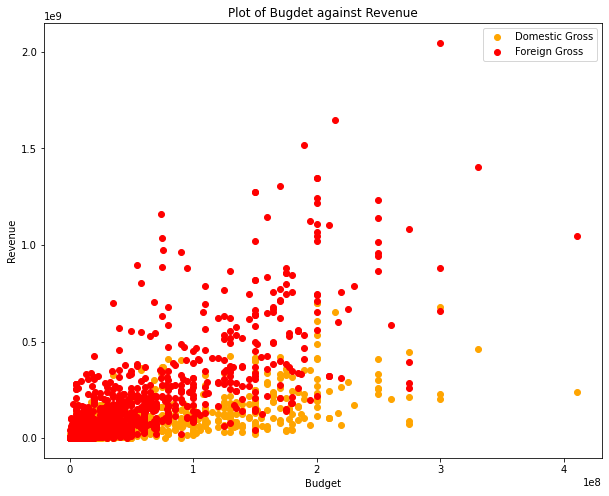

In [133]:
# A scatter plot of production budget vs domestic and foreign gross
plt.figure(figsize=(10, 8))
plt.scatter(df_join2['production_budget'], df_join2['domestic_gross'], color='orange', label='Domestic Gross')
plt.scatter(df_join2['production_budget'], df_join2['foreign_gross'], color='red', label='Foreign Gross')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Plot of Bugdet against Revenue')
plt.legend()
plt.show()

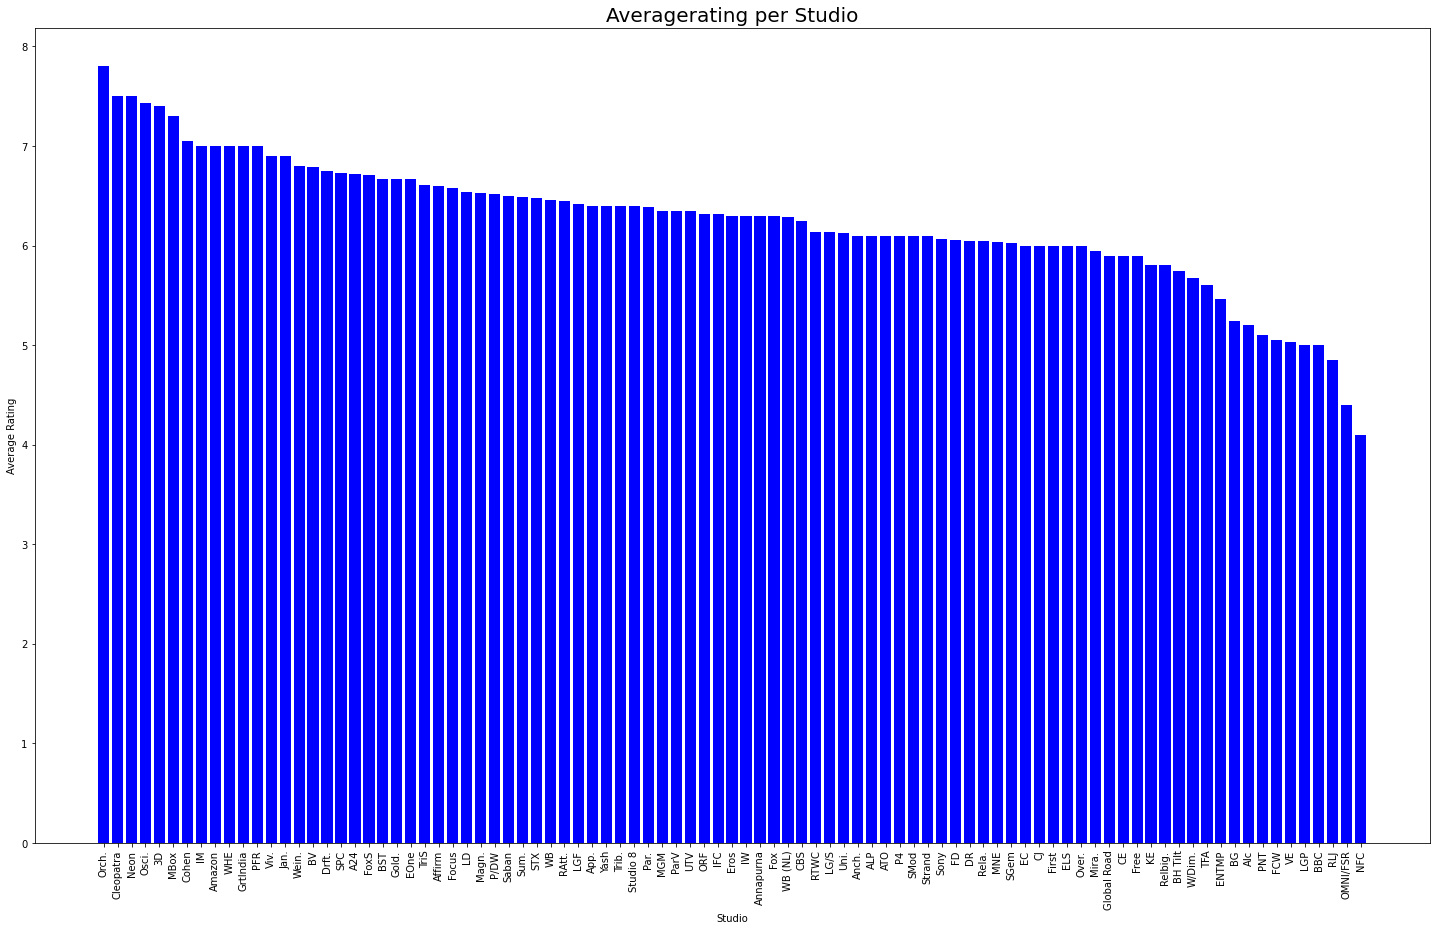

In [134]:
# Group the data by studio and calculate the average rating
average_ratings = df_join2.groupby('studio')['averagerating'].mean()

# Sort the average ratings in descending order
ratings = average_ratings.sort_values(ascending=False)

# Plot the average ratings by studio
plt.figure(figsize=(25, 15))
plt.bar(ratings.index, ratings.values,color = 'blue')
plt.xlabel('Studio')
plt.ylabel('Average Rating')
plt.title('Averagerating per Studio',fontsize= 20)
plt.xticks(rotation=90)
plt.show()

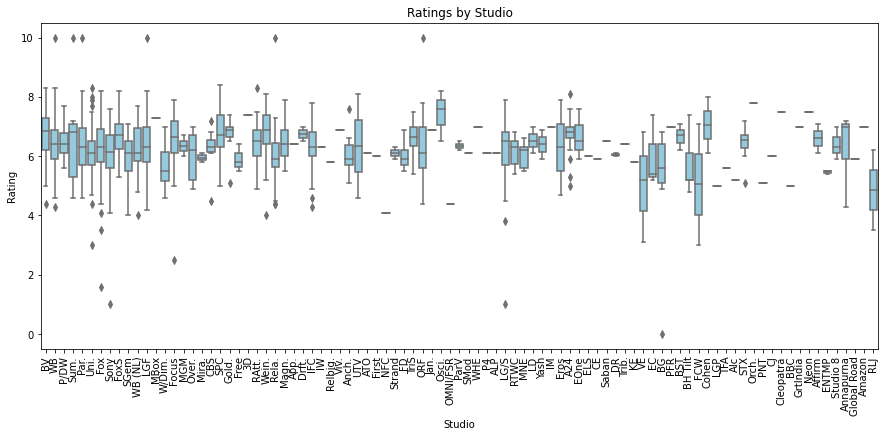

In [135]:
# Create a box plot of film ratings by studio
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_join2, x='studio', y='averagerating', color = 'skyblue')
plt.xlabel('Studio')
plt.ylabel('Rating')
plt.title('Ratings by Studio')
plt.xticks(rotation=90)
plt.show()

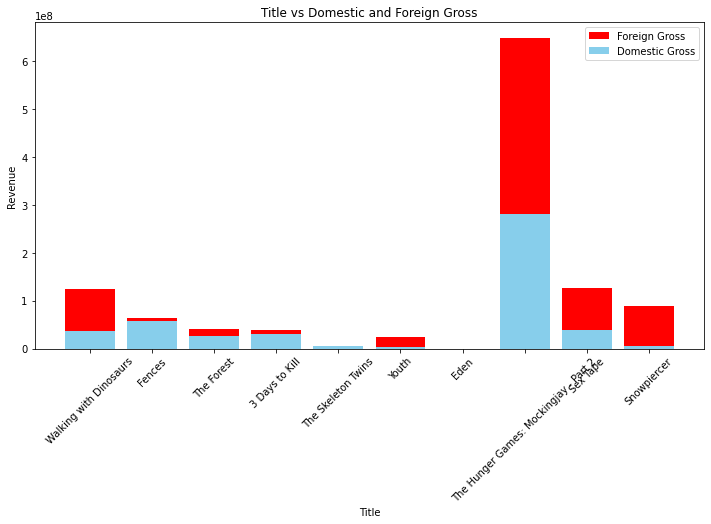

In [136]:
# Select a subset of movie titles
 # Selecting 10 random movies
subset_df = df_join2.sample(10) 
# Plot movie titles against domestic and foreign gross
plt.figure(figsize=(12, 6))
plt.bar(subset_df['title'], subset_df['foreign_gross'], color='red', label='Foreign Gross')
plt.bar(subset_df['title'], subset_df['domestic_gross'], color='skyblue', label='Domestic Gross')
plt.xlabel('Title')
plt.ylabel('Revenue')
plt.title('Title vs Domestic and Foreign Gross')
plt.legend()
plt.xticks(rotation=45)
plt.show()